In [1]:
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np

import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
from geopy.distance import vincenty, great_circle
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from mpl_toolkits import basemap
import warnings
from exceptions import KeyError
from netCDF4 import Dataset

from salishsea_tools import viz_tools
%matplotlib inline

In [21]:
def compute_zonal(kappa,calcKappa=False, zonalmask=False):

    k_zonal = np.zeros((len(kappa[:,0,0]),len(kappa[0,:,0])), dtype='float64')
    
    if calcKappa==True:
        for k in np.arange(0,len(kappa[:,0,0])):
            counter = 0.0
            tot = 0.0
            for i in np.arange(0,len(kappa[0,:,0])):
                for j in np.arange(0,len(kappa[0,0,:])):
                    if ma.is_masked(kappa[k,i,j]) == False and kappa[k,i,j]>0.0:
                            counter = counter+volume[k,i,j]
                            tot = tot + np.log(kappa[k,i,j])*volume[k,i,j]
                
                if counter!= 0.0:
                    k_zonal[k,i] = np.exp(tot/counter)
                    
    elif zonalmask==True:
        for k in np.arange(0,len(kappa[:,0,0])):
            for i in np.arange(0,len(kappa[0,:,0])):
                k_zonal[k,i] = np.sum(kappa[k,i,:])/len(kappa[k,i,:])
        
    else:
        for k in np.arange(0,len(kappa[:,0,0])):
            for i in np.arange(0,len(kappa[0,:,0])):
                counter = 0.0
                tot = 0.0
                for j in np.arange(0,len(kappa[0,0,:])):
                    if ma.is_masked(kappa[k,i,j]) == False:
                            counter = counter+1
                            tot = tot + kappa[k,i,j]
                if counter!= 0:

                    k_zonal[k,i] = tot/counter
    print('finished zonal calculation')
    
    return k_zonal

In [3]:
#state locations of output
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

In [4]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)
grid = nc.Dataset('/home/jacquielee/data/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy = grid.variables['Bathymetry'][:]
bathy = ma.masked_values(bathy[:],0)
zlevels=mesh.variables['gdept_0'][0]
lat=mesh.variables['nav_lat']
lon=mesh.variables['nav_lon']
e1t= mesh.variables['e1t'][0,:,:]  # dx
e2t= mesh.variables['e2t'][0,:,:]  # dy 
e3t= mesh.variables['e3t'][0,:,:,:]
volume=e1t*e2t*e3t
volume_density = (volume / np.sum(volume))*100

In [5]:
H=zlevels[:]
np.set_printoptions(suppress=True)
print(H[22:])

[  109.7292808    130.66598418   155.85072861   186.12556728   222.47516907
   266.04024908   318.12742659   380.21302111   453.93774517   541.08890874
   643.56684341   763.33305097   902.33931191  1062.43972124  1245.29111236
  1452.25093765  1684.28440079  1941.89340079  2225.07793765  2533.33611236
  2865.70272124  3220.82031191  3597.03205097  3992.48384341  4405.22390874
  4833.29074517  5274.78402111  5727.91642659]


In [18]:
#csal = ma.array(nc.Dataset(control_storage+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)
#ctemp = ma.array(nc.Dataset(control_storage+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
#ckappa = ma.array(nc.Dataset(control_storage+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)

#psal = ma.array(nc.Dataset(polzin+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)
#ptemp = ma.array(nc.Dataset(polzin+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
#pkappa = ma.array(nc.Dataset(polzin+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)
pkaptidal = ma.array(nc.Dataset(polzin+'2012-2016avg_votkeavtidal.nc').variables['votkeavtidalfour'],mask=(mask-1)*-1)

#sjsal = ma.array(nc.Dataset(stlandj+'2012-2016avg_vosaline.nc').variables['vosalinefour'],mask=(mask-1)*-1)
#sjtemp = ma.array(nc.Dataset(stlandj+'2012-2016avg_votemper.nc').variables['votemperfour'],mask=(mask-1)*-1)
#sjkappa = ma.array(nc.Dataset(stlandj+'2012-2016avg_votkeavt.nc').variables['votkeavtfour'],mask=(mask-1)*-1)
sjkaptidal = ma.array(nc.Dataset(stlandj+'2012-2016avg_votkeavtidal.nc').variables['votkeavtidalfour'],mask=(mask-1)*-1)

finished zonal calculation


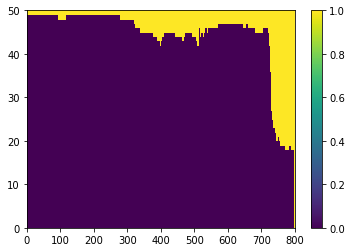

In [19]:
zonal_mask = compute_zonal(mask,zonalmask=True)*(-1)
zonal_mask[zonal_mask[:,:]==0.0]=1
zonal_mask[zonal_mask[:,:]<0.0]=0
z = plt.pcolor(zonal_mask)
plt.colorbar(z)
plt.show()

In [22]:
# csal = ma.array(compute_zonal(csal[:,:,:]),mask=zonal_mask)
# ctemp = ma.array(compute_zonal(ctemp),mask=zonal_mask)
# cnsq = ma.array(compute_zonal(cnsq),mask=zonal_mask)
#ckappa = ma.array(compute_zonal(ckappa,calcKappa=True),mask=zonal_mask)

# psal = ma.array(compute_zonal(psal),mask=zonal_mask)
# ptemp = ma.array(compute_zonal(ptemp),mask=zonal_mask)
# pnsq = ma.array(compute_zonal(pnsq),mask=zonal_mask)
#pkappa = ma.array(compute_zonal(pkappa,calcKappa=True),mask=zonal_mask)
pkappatidal = ma.array(compute_zonal(pkaptidal,calcKappa=True),mask=zonal_mask)

# sjsal = ma.array(compute_zonal(sjsal),mask=zonal_mask)
# sjtemp = ma.array(compute_zonal(sjtemp),mask=zonal_mask)
# sjnsq = ma.array(compute_zonal(sjnsq),mask=zonal_mask)
#sjkappa = ma.array(compute_zonal(sjkappa,calcKappa=True),mask=zonal_mask)
sjkappatidal = ma.array(compute_zonal(sjkaptidal,calcKappa=True),mask=zonal_mask)

finished zonal calculation
finished zonal calculation


In [9]:
# csal.dump('csal_zonal.npy')
# psal.dump('psal_zonal.npy')
# sjsal.dump('sjsal_zonal.npy')

# ctemp.dump('ctemp_zonal.npy')
# ptemp.dump('ptemp_zonal.npy')
# sjtemp.dump('sjtemp_zonal.npy')

# cnsq.dump('cnsq_zonal.npy')
# pnsq.dump('pnsq_zonal.npy')
# sjnsq.dump('sjnsq_zonal.npy')

#ckappa.dump('ckappa_zonal.npy')
#pkappa.dump('pkappa_zonal.npy')
#sjkappa.dump('sjkappa_zonal.npy')

pkappatidal.dump('pkappatidal_zonal.npy')
sjkappatidal.dump('sjkappatidal_zonal.npy')

In [10]:
csal = np.load('csal_zonal.npy')
psal= np.load('psal_zonal.npy')
sjsal= np.load('sjsal_zonal.npy')

ctemp= np.load('ctemp_zonal.npy')
ptemp= np.load('ptemp_zonal.npy')
sjtemp= np.load('sjtemp_zonal.npy')

cnsq= np.load('cnsq_zonal.npy')
pnsq= np.load('pnsq_zonal.npy')
sjnsq= np.load('sjnsq_zonal.npy')

In [11]:
labels3 = ['20S', '4N', '28N', '48N', '64N', '77N', '86N', '78N']

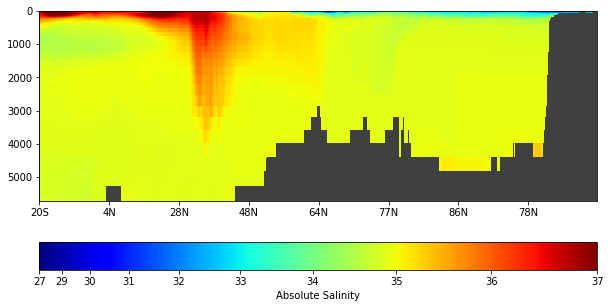

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('jet')
cmap.set_bad('0.25',alpha=None)
norm = colors.PowerNorm(2,vmin=27, vmax=37)
mesh = ax.pcolormesh(X,Y,csal,norm=norm,cmap=cmap)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3)
ticks = [27,29,30,31,32,33,34,35,36,37]
bar = plt.colorbar(mesh, ticks=ticks,orientation='horizontal' ,label='Absolute Salinity')
# ax[1].pcolor(X,Y,ctemp)
# ax[1].set_ylim(ax[1].get_ylim()[::-1])
# ax[2].pcolor(X,Y,ckappa)
# ax[2].set_ylim(ax[1].get_ylim()[::-1])

In [23]:
sjkappatidal[5,750]

6.3650334019497935e-05

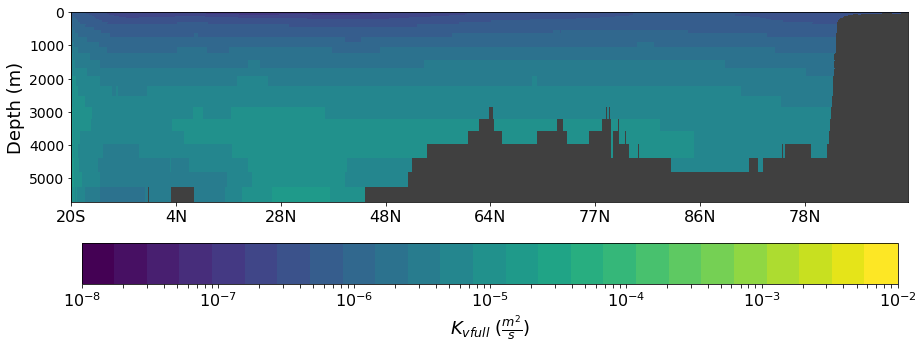

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('viridis',25)
cmap.set_bad('0.25')
#cmap.set_under('white')
#norm = colors.Normalize(vmin=-1, vmax=1)
#norm = mpl.colors.BoundaryNorm(sal_bounds, cmap.N)
norm = colors.LogNorm(vmin=10**-8, vmax=10**-2)
#norm = colors.LogNorm(vmin=10**-6, vmax=10**-2)
#norm = mpl.colors.BoundaryNorm(kappa_bounds, cmap.N)
mesh = ax.pcolormesh(X,Y,pkappatidal,cmap=cmap,norm=norm)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3,fontsize=16)

ax.set_ylabel('Depth (m)', fontsize=18)
plt.tick_params(axis='y',which='major',labelsize=14)
# ticks = [27,29,30,31,32,33,34,35,36,37]
bar = plt.colorbar(mesh,orientation='horizontal')
#bar = plt.colorbar(mesh,orientation='horizontal' ,ticks=kappa_bounds[:])
#bar.set_ticklabels(kappa_labels)
bar.ax.tick_params(labelsize=16)
label = r'$K_{vfull}$ '+r'($\frac{m^2}{s}$)'
#label = 'Conservative Temperature Anomaly ($^\circ$C)'
#label = 'Salinity Anomaly (PSU)'
bar.set_label(label,fontsize=18)
bar.update_ticks()

In [33]:
#kappa_bounds = np.array([-10**-2, -10**-3,-10**-4,-10**-5,-10**-6,0.0,
#                         10**-6,10**-5,10**-4,10**-3,10**-2])
#kappa_labels = [r'${-10^{-2}}$',r'${-10^{-3}}$',r'${-10^{-4}}$',r'${-10^{-5}}$',r'${-10^{-6}}$','0',
#                r'${10^{-6}}$',r'${10^{-5}}$',r'${10^{-4}}$',r'${10^{-3}}$',r'${10^{-2}}$']

kappa_bounds = np.array([-10**-2, -10**-3,-10**-4,-10**-5,-10**-6,-10**-7,-10**-8,0.0,
                        10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2])

kappa_labels = [r'${-10^{-2}}$',r'${-10^{-3}}$',r'${-10^{-4}}$',r'${-10^{-5}}$',r'${-10^{-6}}$',
                r'${-10^{-7}}$',r'${-10^{-8}}$','0',r'${10^{-8}}$',r'${10^{-7}}$',
                r'${10^{-6}}$',r'${10^{-5}}$',r'${10^{-4}}$',r'${10^{-3}}$',r'${10^{-2}}$']

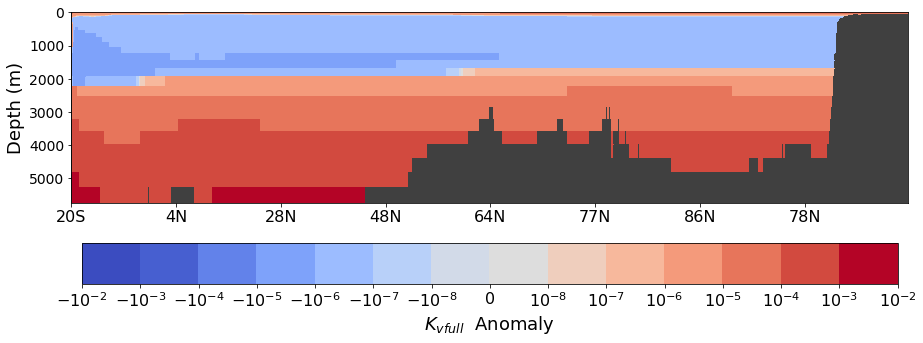

In [34]:
    
fig, ax = plt.subplots(1,1, figsize=(15,5)) 
x = np.arange(0,800)
y = zlevels[:]
X, Y = np.meshgrid(x[:], y[:])
cmap = plt.get_cmap('coolwarm',25)
cmap.set_bad('0.25')
cmap.set_over('gray')
#norm = colors.Normalize(vmin=-1, vmax=1)
#norm = mpl.colors.BoundaryNorm(sal_bounds, cmap.N)
norm = mpl.colors.BoundaryNorm(kappa_bounds, cmap.N)
#norm = colors.LogNorm(vmin=10**-6, vmax=10**-2)
#norm = mpl.colors.BoundaryNorm(kappa_bounds, cmap.N)
mesh = ax.pcolormesh(X,Y,sjkappatidal-pkappatidal,cmap=cmap,norm=norm)
plt.ylim(zlevels[0],zlevels[-1])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xticklabels(labels3,fontsize=16)

ax.set_ylabel('Depth (m)', fontsize=18)
plt.tick_params(axis='y',which='major',labelsize=14)
# ticks = [27,29,30,31,32,33,34,35,36,37]

bar = plt.colorbar(mesh,orientation='horizontal',ticks=kappa_bounds)# ,label='Buoyancy Frequency ('+r'${N^2}$'+')',labelsize=18)
#bar = plt.colorbar(mesh,orientation='horizontal')# ,ticks=nsq_bounds)

bar.set_ticklabels(kappa_labels)

bar.ax.tick_params(labelsize=16)
#label = r'$K_{vfull}$ '+r'($\frac{m^2}{s}$)'
label = '$K_{vfull}$  Anomaly'
#label = 'Conservative Temperature Anomaly ($^\circ$C)'
#label = 'Salinity Anomaly (PSU)'
bar.set_label(label,fontsize=18)

#bar.set_label(label, fontsize=14)
#bar.ax.tick_params(labelsize=14)
bar.update_ticks()
